In [19]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the CSV file
file_path = '/Users/hyin/ags_local/data/haiti_seissol_data/dynamic-rupture/regional-only-simplified/jobid_3515150/'  # This CSV is taken for 
data = pd.read_csv(file_path + 'values-over-line.csv')


## Pull out Jobid
# Extract the last directory name
last_dir = os.path.basename(os.path.normpath(file_path))
# Split the last directory name by underscore and get the job ID
if last_dir.startswith('jobid_'):
    job_id = last_dir.split('_')[-1]
else:
    print("Job ID not found")

# Perform element-by-element multiplication
mu_s = 0.6  # Replace with your desired multiplier
mu_d = 0.2
data[f'T_y'] = np.absolute(mu_s * data['Pn0'])
data[f'T_f'] = np.absolute(mu_d * data['Pn0'])
data[f'shear_stress'] = np.sqrt((data['Ts0']**2 + data['Td0']**2))
z = data['Points_2']

# data

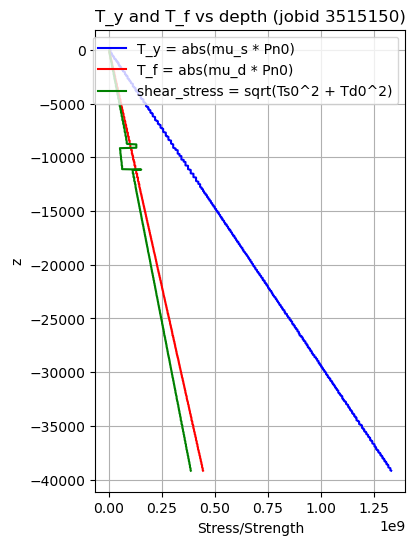

In [20]:
# Plotting the new variable
plt.figure(figsize=(4, 6))
plt.plot(data['T_y'],z, color='blue', label='T_y = abs(mu_s * Pn0)') # , marker='o'
plt.plot(data['T_f'],z, color='red', label='T_f = abs(mu_d * Pn0)') # , marker='o'
plt.plot(data['shear_stress'],z, color='green', label='shear_stress = sqrt(Ts0^2 + Td0^2)') # , marker='o'

# Adding labels and title
plt.xlabel('Stress/Strength')
plt.ylabel('z')
# plt.gca().invert_xaxis()
plt.title(f'T_y and T_f vs depth (jobid ' + job_id + ')')
plt.grid(True)
plt.legend()

plt.savefig(file_path + 'values-over-line_plot.png')
# Show the plot
plt.show()



In [ ]:
# # Save the modified data to a new CSV file (optional)
# output_file_path = 'modified_file.csv'  # Replace with desired output file name
# data.to_csv(output_file_path, index=False)

# # Print the first few rows to verify
# print(data.head())